In [20]:
import pandas as pd
from sklearn import metrics

In [21]:
%run ./DataGen2.ipynb

In [86]:
ID = '3'

In [87]:
filename = 'simulated_SMLM_' + ID + '.csv'
path = '/Users/Eliana/Documents/PDM/Codes/My_codes/Data/'

In [88]:
data = pd.read_csv(path + filename)

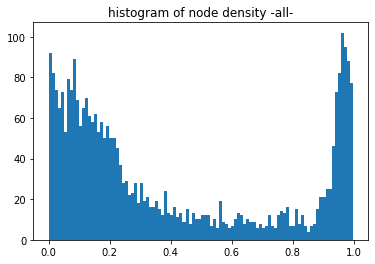

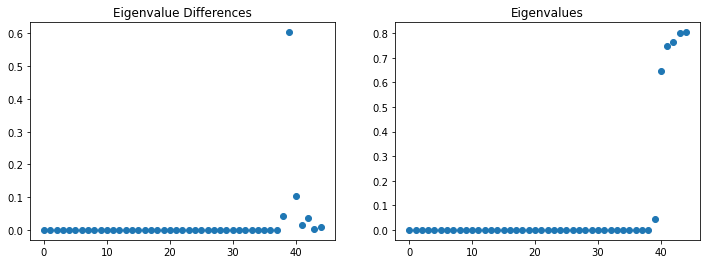

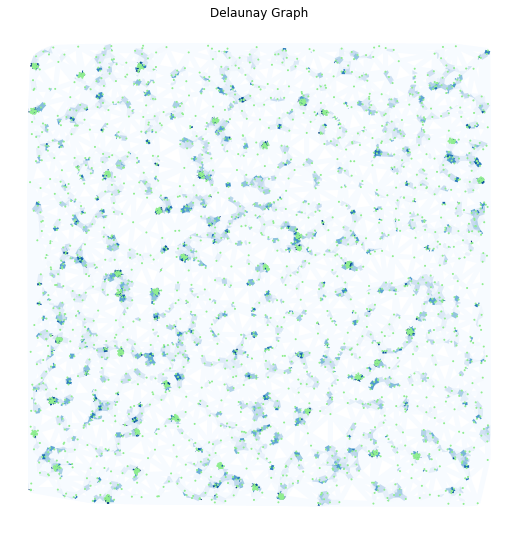

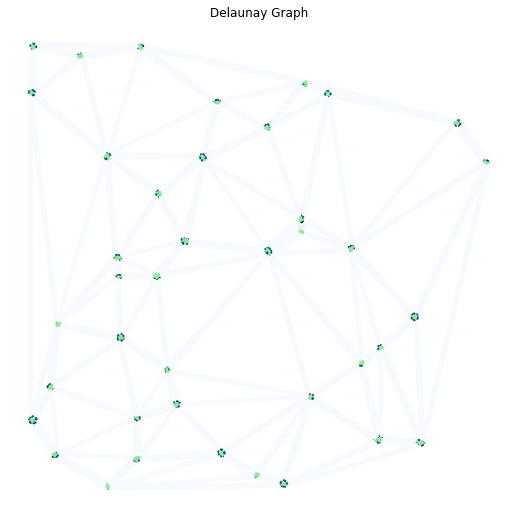

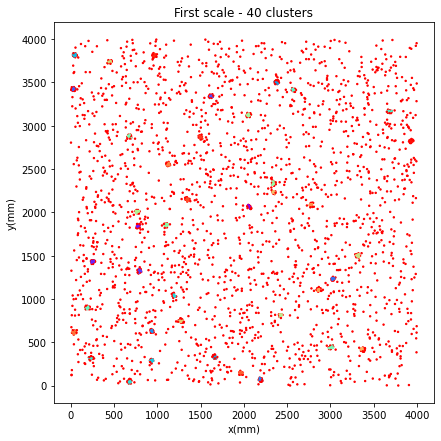

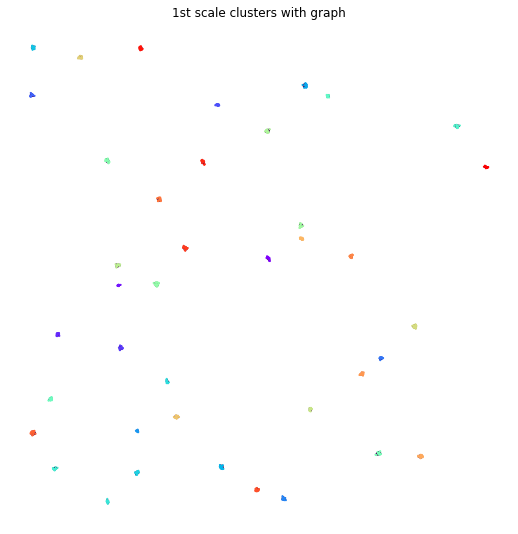

In [90]:
P1 = data[['x', 'y']].to_numpy() # select the coordinates columns, and transform into a numpy object
truelabels = data['labels_1'].to_numpy()

Sigma1          = np.ones((P1.shape[0], 2, 2)) * 0.5
Sigma1[:, 0, 1] = 0
Sigma1[:, 1, 0] = 0
n1              = np.ones((P1.shape[0], 1)).ravel()

sigma_s = 35
noise_thresh = 0.85
density1, noise_points1, not_noise_points1, G0 = denoise(P1, Sigma1, sigma_s, noise_thresh, 1)
labels1, G1, k1 = cluster_single_scale(P1, Sigma1, not_noise_points1, sigma_s, 1)
plot_the_graph(G0, P1, 'Delaunay Graph', 1)
plot_the_graph(G1, P1[not_noise_points1], 'Delaunay Graph', 1)
labels1_fid     = labels1
plot_points(P1, labels1, 'First scale - ' + str(k1) + ' clusters', 2)
plot_clusters_with_graph(G1, P1[not_noise_points1], labels1_fid[not_noise_points1], '1st scale clusters with graph', 1)



In [75]:
labels1_fid += 1
labels1_fid

array([13., 13., 13., ...,  0.,  0.,  0.])

In [76]:
truelabels = data['labels_1'].to_numpy()
truelabels

array([1, 1, 1, ..., 0, 0, 0])

In [77]:
res_FMI = metrics.fowlkes_mallows_score(truelabels, labels1_fid)

In [78]:
res_FMI

0.9197277593105596

In [79]:
tomato_res = pd.read_csv(path + 'tomato_result_' + ID + '.csv')['x'].values

In [80]:
tomato_res

array([1, 1, 1, ..., 0, 0, 0])

In [81]:
FMI_tomato = metrics.fowlkes_mallows_score(truelabels, tomato_res)
FMI_tomato

0.9002735443314847

In [46]:
len(tomato_res)

500

In [121]:
DF = datagen2.GetAllData()

In [127]:
xmin, xmax, ymin, ymax = 2000, 3000, 2000, 3000

In [133]:
x_short = DF[(DF['x'] > xmin) & (DF['x'] < xmax)]

In [134]:
len(x_short)

1850

In [135]:
xy_short = x_short[(x_short['y'] > ymin)  & (x_short['y'] < ymax)]

In [136]:
xy_short

,x,y,labels_1
250,2327.946845,2242.298448,11
251,2314.178310,2249.775340,11
252,2326.789680,2246.796704,11
253,2320.468186,2226.545933,11
254,2326.013180,2250.777457,11
...,...,...,...
15659,2332.188980,2765.197828,0
15677,2227.830955,2938.177187,0
15805,2951.832309,2312.827058,0
15857,2136.210629,2322.145581,0


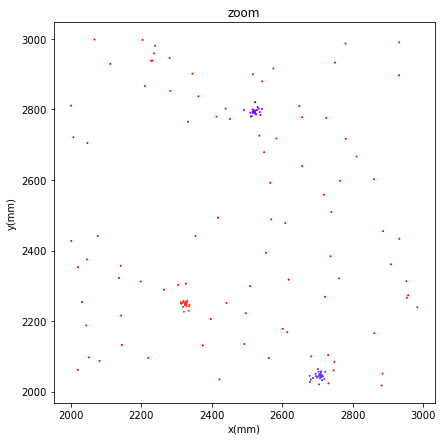

In [138]:
XY = xy_short[['x', 'y']].to_numpy()
LAB = xy_short[['labels_1']].to_numpy()
plot_points(XY, LAB, 'zoom', 1)

In [139]:
xy_short.to_csv('/Users/Eliana/Documents/PDM/Codes/My_codes/standard_zoom_for_tomato.csv', index = False)


In [119]:
with open('/Users/Eliana/Documents/PDM/Codes/My_codes/Data/standard_param.txt', 'w') as f:
    print(dict_parameters, file=f)
    print('# this configuration is considered as standard', file = f)

In [121]:
with open('/Users/Eliana/Documents/PDM/Codes/My_codes/Data/standard_param.txt', 'a') as f:
    print(' # essai d ajouter qqch', file = f) 
    # Top ça a marché: écrire un nouveau avec 'w', ajouter qqch avec 'a'

In [ ]:
datagen2.save_to_csv('/Users/Eliana/Documents/PDM/Codes/My_codes/Data', 'standard')

In [92]:
liste = [3,4,5,0,8,0,9,7,0,9,8,3,0,1,0,1,0,0,0,0,1,1]


output = [idx for idx, element in enumerate(liste) if element == 0 ]

In [96]:
liste_np = np.array(liste)
IDX = np.where(liste_np == 0)[0]

In [97]:
IDX

array([ 3,  5,  8, 12, 14, 16, 17, 18, 19])

In [99]:
print(liste_np[IDX])

[0 0 0 0 0 0 0 0 0]
